In [1]:
%matplotlib inline
import requests,pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', None)

In [2]:
years=['2010', '2011', '2012', '2013', '2014', '2015','2016','2017','2018','2019']

In [3]:
walked='B08301_019E'
biked = 'B08301_018E'
total='B08301_001E'

exp = 'walked'
exp2 = 'biked'

#'B13002_008E':'teen_births_'

lister=[]
for y in years:
    api_key="82f500dafcf2fc95782edc62aeb02a67248fe713"
    year='2019'
    dsource='acs'
    dname='acs5'
    cols='NAME,' + walked + ","+ biked + ","+ total
    state='48'
    county='113'

    base_url = f'https://api.census.gov/data/{y}/{dsource}/{dname}'
    data_url = f'{base_url}?get={cols}&for=state:*&key={api_key}'
    response=requests.get(data_url)
    data=response.json()
    df=pd.DataFrame(data[1:], columns=data[0])
    
    df['B08301_019E']=df['B08301_019E'].astype('int64')
    df['B08301_018E']=df['B08301_018E'].astype('int64')
    df['B08301_001E']=df['B08301_001E'].astype('int64')
    
    df['walked_biked_percentage' + y] = (df['B08301_019E'] + df['B08301_018E'])/df['B08301_001E']
    
    df.drop(columns=['state','B08301_019E','B08301_018E','B08301_001E'], inplace=True)
    
    lister.append(df)
    
    
    
    

In [4]:
lister[0]
df1=lister[0]
for l in range(1, len(lister)):
    df1 = df1.merge(lister[l], on='NAME')
    
df1

,NAME,walked_biked_percentage2010,walked_biked_percentage2011,walked_biked_percentage2012,walked_biked_percentage2013,walked_biked_percentage2014,walked_biked_percentage2015,walked_biked_percentage2016,walked_biked_percentage2017,walked_biked_percentage2018,walked_biked_percentage2019
0,Alabama,0.013561,0.013425,0.013222,0.012966,0.012700,0.012399,0.012566,0.012212,0.012231,0.012261
1,Alaska,0.091620,0.087325,0.084797,0.089397,0.089077,0.087726,0.088295,0.088907,0.086901,0.085749
2,Arizona,0.030330,0.030336,0.030315,0.030751,0.030004,0.030424,0.029535,0.029176,0.028281,0.027499
3,Arkansas,0.019085,0.019452,0.019170,0.018796,0.018771,0.019014,0.019034,0.019135,0.019058,0.019300
4,California,0.037039,0.037802,0.038054,0.038159,0.038381,0.038370,0.038008,0.037318,0.036610,0.035696
5,Colorado,0.042322,0.043102,0.043717,0.044008,0.043211,0.042996,0.042678,0.040751,0.040461,0.039670
6,Connecticut,0.032720,0.032725,0.032159,0.032970,0.033387,0.033501,0.032490,0.031738,0.030562,0.029755
7,Delaware,0.028668,0.026713,0.025611,0.025884,0.025186,0.024711,0.024400,0.024697,0.024378,0.024188
8,District of Columbia,0.141491,0.145162,0.151474,0.157286,0.162572,0.169021,0.175687,0.178268,0.175867,0.178425
9,Florida,0.022149,0.021799,0.022043,0.022167,0.022115,0.021720,0.021712,0.021158,0.020592,0.020434


In [5]:
df_all = pd.melt(df1, id_vars='NAME')
df_all_2019 = df_all[df_all['variable'].str.endswith('2019')]
df_all_2019.sort_values(['value'])

,NAME,variable,value
468,Alabama,walked_biked_percentage2019,0.012261
492,Mississippi,walked_biked_percentage2019,0.014332
510,Tennessee,walked_biked_percentage2019,0.014377
478,Georgia,walked_biked_percentage2019,0.017128
511,Texas,walked_biked_percentage2019,0.017747
471,Arkansas,walked_biked_percentage2019,0.019300
504,Oklahoma,walked_biked_percentage2019,0.019775
501,North Carolina,walked_biked_percentage2019,0.019972
477,Florida,walked_biked_percentage2019,0.020434
493,Missouri,walked_biked_percentage2019,0.021452


In [6]:
df_all = pd.melt(df1, id_vars='NAME')
df_all_2018 = df_all[df_all['variable'].str.endswith('2018')]
df_all_2018.sort_values(['value'])

,NAME,variable,value
416,Alabama,walked_biked_percentage2018,0.012231
458,Tennessee,walked_biked_percentage2018,0.014613
440,Mississippi,walked_biked_percentage2018,0.015021
426,Georgia,walked_biked_percentage2018,0.017162
459,Texas,walked_biked_percentage2018,0.017841
419,Arkansas,walked_biked_percentage2018,0.019058
452,Oklahoma,walked_biked_percentage2018,0.020379
449,North Carolina,walked_biked_percentage2018,0.020379
425,Florida,walked_biked_percentage2018,0.020592
441,Missouri,walked_biked_percentage2018,0.021586


In [ ]:
df_all_2018
df_all_2019.to_csv("c:\\users\\robert\\desktop\\walked_2019.csv")

In [19]:
tx= df1[df1['NAME']=='Texas']
tx

,NAME,walked_biked_percentage2010,walked_biked_percentage2011,walked_biked_percentage2012,walked_biked_percentage2013,walked_biked_percentage2014,walked_biked_percentage2015,walked_biked_percentage2016,walked_biked_percentage2017,walked_biked_percentage2018,walked_biked_percentage2019
43,Texas,0.019924,0.019663,0.019435,0.019111,0.018884,0.018859,0.01849,0.018233,0.017841,0.017747


In [20]:
df2 = pd.melt(tx, id_vars='NAME')
df2

,NAME,variable,value
0,Texas,walked_biked_percentage2010,0.019924
1,Texas,walked_biked_percentage2011,0.019663
2,Texas,walked_biked_percentage2012,0.019435
3,Texas,walked_biked_percentage2013,0.019111
4,Texas,walked_biked_percentage2014,0.018884
5,Texas,walked_biked_percentage2015,0.018859
6,Texas,walked_biked_percentage2016,0.018490
7,Texas,walked_biked_percentage2017,0.018233
8,Texas,walked_biked_percentage2018,0.017841
9,Texas,walked_biked_percentage2019,0.017747


In [21]:
df2['year']=df2['variable'].str[-4:]
df2

,NAME,variable,value,year
0,Texas,walked_biked_percentage2010,0.019924,2010
1,Texas,walked_biked_percentage2011,0.019663,2011
2,Texas,walked_biked_percentage2012,0.019435,2012
3,Texas,walked_biked_percentage2013,0.019111,2013
4,Texas,walked_biked_percentage2014,0.018884,2014
5,Texas,walked_biked_percentage2015,0.018859,2015
6,Texas,walked_biked_percentage2016,0.018490,2016
7,Texas,walked_biked_percentage2017,0.018233,2017
8,Texas,walked_biked_percentage2018,0.017841,2018
9,Texas,walked_biked_percentage2019,0.017747,2019


In [24]:
from bokeh.plotting import figure, output_notebook,show

output_notebook()
    
# instantiating the figure object
graph = figure(title = "Bokeh Line Graph",  y_range=(0,.1))
  
# the points to be plotted
x = df2['year'].tolist()
y =df2['value'].tolist()
   
# plotting the line graph
graph.line(x, y)
   
# displaying the model
#show(graph)

show(graph, notebook_handle=True)

# Update the plot title in the earlier cell
#plot.title.text = "New Title"
#push_notebook(handle=handle)

Loading BokehJS ...

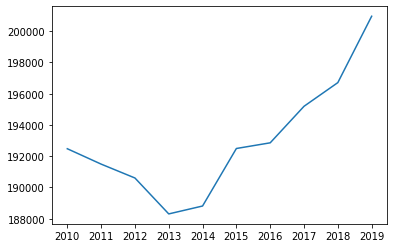

In [11]:
import matplotlib.pyplot as plt
import numpy as np
  
# define data values
x1 = df2['year'].tolist()
df2['value']= df2['value'].astype('int64')
y1 =df2['value'].tolist()
  
plt.plot(x1, y1)  # Plot the chart
plt.show()  # display